[Project (“Anna Karenina”)](#section1)<br>

which it is  scrambled as follows:

1.Shuffled the order of the chapters contained in each part of the book.

2.Substituted the numbering of each chapter with the square of the n-th prime number, where n is the original chapter number (e.g. “Chapter 2” becomes “Chapter 9”).

3.Selected a randomly selected set of lines, on which we have:
      Substituted the space character with the squared or cubed n-th prime, where n is the original chapter number (e.g.    the first line of chapter 1 of Part ONE becomes
  “Happy4families4are4all4alike;4every4unhappy4family4is4unhappy4in4its”).
  
4.Substituted the comma character with ‘foo’ (e.g. the line “the kitchen-maid, and the coachman had given warning“ becomes “the kitchen-maidfoo and the coachman had given warning”).


[Problem Statement](#section1)<br>
1. Compute the number of unique words and the overall the number of sentences.
2. Compute the average word-length of a sentence, and the longest one.
3. Group above statistics by chapter and by part.


In [66]:
## Organising the Imports 
import os 
import re 
import subprocess
import numpy as np
import pandas as pd
import collections
import logging
import statistics 
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
basePath= os.path.dirname(os.getcwd())
filePath=basePath+"/Task_SC/book_scrambled.txt"
print(filePath)

/Users/pbishwal/Documents/Techie/others/Task_SC/book_scrambled.txt


In [3]:
## function to get list of prime numbers between 2 to 200, 
## assumption that max prime number squared present between 2-200

def getPrimeNumbers():
    start = 2 
    end = 200
    primeList=[]
    for val in range(start, end + 1): 
        # If num is divisible by any number   
        # between 2 and val, it is not prime  
        if val > 1: 
            for n in range(2, val): 
                if (val % n) == 0: 
                    break
            else: 
                primeList.append(val)
    return primeList

In [4]:
primeList=getPrimeNumbers()

In [5]:
primeList[0:10]

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

In [6]:
data=[]
with open (filePath, "r") as myfile:
    data = myfile.read().splitlines()
    data=list(filter(None, data)) 

In [7]:
## get the index where Chapter is present 
chapterIndexes=[i for i, item in enumerate(data) if re.search('Chapter', item)]

In [8]:
chapterIndexes[0:4]

[53, 197, 261, 403]

In [9]:
## get the Part Indexes 
## part indexes can't be found directly as it has multiple occurences 
## Idea: Get the Chapter Indexes and  PART Lies above it (-1 position of chapter)
## GET the partTempIndex where PART occures  and get justBeforePart (-1 from chapter Index) and do an intersection
partTempIndex=[i for i, item in enumerate(data) if re.search('PART', item)]
justBeforePart=[i-1 for i in chapterIndexes]
partIndexes=[value for value in justBeforePart if value in partTempIndex]

In [10]:
partIndexes[0:10]

[52, 4629, 9998, 13958, 18239, 27804, 27911, 28997, 30336, 37287]

In [11]:
def getdictionaryWithInitialData(indexesList):
    lastIndexOfData = len(data)
    import collections
    dt = collections.defaultdict(list)
    for i in range(len(indexesList)):
        if(i+1<len(indexesList)):
            dt[data[indexesList[i]]].append(data[indexesList[i]+1:indexesList[i+1]] )
        else:
            dt[data[indexesList[i]]].append(data[indexesList[i]+1:lastIndexOfData] )
    allDict=dict(dt)
    return allDict

In [12]:
## pass the chapter Indexes and get initial dictionary
chapterDictInitial=getdictionaryWithInitialData(chapterIndexes)

In [15]:
## print key and numeber of elements in initial Dictionory found above
for key in chapterDictInitial:
    print("key : ",key, " Number of elements: ",len(chapterDictInitial[key]))

key :  Chapter 961  Number of elements:  36
key :  Chapter 2809  Number of elements:  36
key :  Chapter 6889  Number of elements:  35
key :  Chapter 10609  Number of elements:  30
key :  Chapter 9  Number of elements:  36
key :  Chapter 6241  Number of elements:  35
key :  Chapter 49  Number of elements:  36
key :  Chapter 16129  Number of elements:  30
key :  Chapter 11449  Number of elements:  30
key :  Chapter 289  Number of elements:  36
key :  Chapter 25  Number of elements:  36
key :  Chapter 1369  Number of elements:  36
key :  Chapter 361  Number of elements:  36
key :  Chapter 18769  Number of elements:  19
key :  Chapter 169  Number of elements:  36
key :  Chapter 12769  Number of elements:  30
key :  Chapter 3481  Number of elements:  36
key :  Chapter 11881  Number of elements:  30
key :  Chapter 7921  Number of elements:  30
key :  Chapter 841  Number of elements:  36
key :  Chapter 1681  Number of elements:  36
key :  Chapter 5041  Number of elements:  35
key :  Chapter 1

In [16]:
## function to unscramble the text and replace nth square/cube in sentences with space and foo by commas

def unscrambledDictionary(initialDict):
    import collections
    import logging
    newdt = collections.defaultdict(list)
    for i,item in enumerate(initialDict):
        numElementsInKey=initialDict[item]
        logging.info('Processing for key :',item,' having ',numElementsInKey)
        for j in range(len(numElementsInKey)):      
            r=initialDict.get(item)[j]
            s=[re.sub("\d+", " ", words) for words in r]
            p=[', '.join(s).replace('foo',",")]
            newdt[item].append(p)
            
    allNewDict=dict(newdt)
    return allNewDict 

In [17]:
unscrambleDict=unscrambledDictionary(chapterDictInitial)

In [18]:
## print key and numeber of elements in initial Dictionory found above
## it should stay same as before unscrambling ,only difference is its clean now removing all unwanted stuffs

for key in unscrambleDict:
    print("key : ",key, " Number of elements: ",len(unscrambleDict[key]))

key :  Chapter 961  Number of elements:  36
key :  Chapter 2809  Number of elements:  36
key :  Chapter 6889  Number of elements:  35
key :  Chapter 10609  Number of elements:  30
key :  Chapter 9  Number of elements:  36
key :  Chapter 6241  Number of elements:  35
key :  Chapter 49  Number of elements:  36
key :  Chapter 16129  Number of elements:  30
key :  Chapter 11449  Number of elements:  30
key :  Chapter 289  Number of elements:  36
key :  Chapter 25  Number of elements:  36
key :  Chapter 1369  Number of elements:  36
key :  Chapter 361  Number of elements:  36
key :  Chapter 18769  Number of elements:  19
key :  Chapter 169  Number of elements:  36
key :  Chapter 12769  Number of elements:  30
key :  Chapter 3481  Number of elements:  36
key :  Chapter 11881  Number of elements:  30
key :  Chapter 7921  Number of elements:  30
key :  Chapter 841  Number of elements:  36
key :  Chapter 1681  Number of elements:  36
key :  Chapter 5041  Number of elements:  35
key :  Chapter 1

In [28]:
## Lets check the value of unscrambleDict for a chapter
##unscrambleDict['Chapter 961'][0]
## below output shows it has now removed unwanted number present
## code commented not to show full output 

## This is below ouput of above 
'''

['Levin emptied his glass, and they were silent for a while., 
“There’s one other thing I ought to tell you. Do you know Vronsky?”, Stepan Arkadyevitch asked Levin.,
......]
'''

In [19]:
## function to get the number of sentences ,unique words ,average word length and longest sentence
def getFinalOutput(unscrambleDict):
    import collections
    import logging
    wordsSentencesForKey = collections.defaultdict(list)
    
    for i,item in enumerate(unscrambleDict):
        numElementsInKey=unscrambleDict[item]
        logging.info('Processing for key :',item,' having ',len(numElementsInKey))
        for j in range(len(numElementsInKey)): 
            for k in unscrambleDict.get(item)[j]:
                w=k.split(".")
                totalSentences=len(w)
                wordsInSentences=[len(set(w[l].split(" "))) for l in range(len(w)) ]
                result={"total_Sentences":totalSentences,"unique_words":sum(wordsInSentences),"longest_sentence":max(wordsInSentences),
                                       "average_word_length":math.ceil(statistics.mean(wordsInSentences))}
                wordsSentencesForKey[item].append(result)
    
    wordsSentencesDict=dict(wordsSentencesForKey)
    return wordsSentencesDict

In [20]:
wordsSentencesChapter=getFinalOutput(unscrambleDict)

In [21]:
## Lets see the ouput of a chapter 
wordsSentencesChapter['Chapter 961']

[{'total_Sentences': 120,
  'unique_words': 1512,
  'longest_sentence': 50,
  'average_word_length': 13},
 {'total_Sentences': 45,
  'unique_words': 709,
  'longest_sentence': 38,
  'average_word_length': 16},
 {'total_Sentences': 120,
  'unique_words': 1512,
  'longest_sentence': 50,
  'average_word_length': 13},
 {'total_Sentences': 46,
  'unique_words': 1052,
  'longest_sentence': 52,
  'average_word_length': 23},
 {'total_Sentences': 45,
  'unique_words': 709,
  'longest_sentence': 38,
  'average_word_length': 16},
 {'total_Sentences': 120,
  'unique_words': 1512,
  'longest_sentence': 50,
  'average_word_length': 13},
 {'total_Sentences': 46,
  'unique_words': 1052,
  'longest_sentence': 52,
  'average_word_length': 23},
 {'total_Sentences': 120,
  'unique_words': 1512,
  'longest_sentence': 50,
  'average_word_length': 13},
 {'total_Sentences': 45,
  'unique_words': 709,
  'longest_sentence': 38,
  'average_word_length': 16},
 {'total_Sentences': 34,
  'unique_words': 623,
  'lon

In [22]:
#### Converting the above ouput to Pandas DataFrame 

column_list=['average_word_length','longest_sentence','total_Sentences','unique_words']
finalDFByChapter=pd.DataFrame(columns=['Original Chapter','average_word_length','longest_sentence','total_Sentences','unique_words'])
for i,item in enumerate(wordsSentencesChapter):
    tempDF =pd.DataFrame( wordsSentencesChapter[item]).apply(pd.to_numeric)
    val=math.ceil(np.sqrt(int(item.split("Chapter ")[1])))
    ## mapped chapter numbers to the original chapter and then get the mapping for nth prime number
    tempDF.insert(0,'Original Chapter',primeList.index(val)+1)
    finalDFByChapter=pd.concat([finalDFByChapter, tempDF]).drop_duplicates()
    ## drop_duplicates is used to drop the duplicates as same chapter is present in other Parts , else can be retained 
finalDFByChapter[column_list] = finalDFByChapter[column_list].apply(pd.to_numeric, errors='coerce')

In [23]:
finalDFByChapter.head(20)

,Original Chapter,average_word_length,longest_sentence,total_Sentences,unique_words
0,11,13,50,120,1512
1,11,16,38,45,709
3,11,23,52,46,1052
9,11,19,49,34,623
12,11,20,63,91,1792
17,11,16,68,150,2314
20,11,14,50,124,1627
21,11,16,39,65,1000
31,11,22,72,47,1029
0,16,18,74,38,677


In [24]:
finalDFByChapter.count()

Original Chapter       253
average_word_length    253
longest_sentence       253
total_Sentences        253
unique_words           253
dtype: int64

In [38]:
finalDFByChapter.groupby(['Original Chapter']).agg({'average_word_length':'mean', 'total_Sentences':'sum','longest_sentence':'max','unique_words':'mean'})

,average_word_length,total_Sentences,longest_sentence,unique_words
Original Chapter,,,,
1,21.500000,502,71,1261.500000
2,15.125000,782,111,1373.875000
3,16.888889,914,78,1537.000000
4,17.750000,653,88,1396.375000
5,18.222222,792,98,1584.444444
6,18.625000,550,117,1147.500000
7,19.375000,650,93,1394.750000
8,20.125000,534,62,1219.375000
9,19.222222,764,84,1511.333333


In [25]:
################################# Computing by Part #####################################

In [26]:
## pass the part Indexes and get initial dictionary
partDictInitial=getdictionaryWithInitialData(partIndexes)

In [27]:
## unscrambe the dictionary 
unscrambleDictPart=unscrambledDictionary(partDictInitial)

In [28]:
wordsSentencesPart=getFinalOutput(unscrambleDictPart)

In [29]:
for key in partDictInitial:
    print("key : ",key, " Number of elements: ",len(partDictInitial[key]))

key :  PART ONE  Number of elements:  8
key :  PART TWO  Number of elements:  7
key :  PART THREE  Number of elements:  6
key :  PART FOUR  Number of elements:  5
key :  PART FIVE  Number of elements:  4
key :  PART SIX  Number of elements:  3
key :  PART SEVEN  Number of elements:  2
key :  PART EIGHT  Number of elements:  1


In [30]:
for key in unscrambleDictPart:
    print("key : ",key, " Number of elements: ",len(unscrambleDictPart[key]))

key :  PART ONE  Number of elements:  8
key :  PART TWO  Number of elements:  7
key :  PART THREE  Number of elements:  6
key :  PART FOUR  Number of elements:  5
key :  PART FIVE  Number of elements:  4
key :  PART SIX  Number of elements:  3
key :  PART SEVEN  Number of elements:  2
key :  PART EIGHT  Number of elements:  1


In [35]:
finalDFByPart=pd.DataFrame(columns=['Part Number','average_word_length','longest_sentence','total_Sentences','unique_words'])
for i,item in enumerate(wordsSentencesPart):
    tempDF =pd.DataFrame( wordsSentencesPart[item])
    tempDF.insert(0,'Part Number',item)
    finalDFByPart=pd.concat([finalDFByPart, tempDF]).drop_duplicates()
    ## drop_duplicates is used to drop the duplicates as same chapter is present in other Parts , else can be retained 

finalDFByPart[column_list] = finalDFByPart[column_list].apply(pd.to_numeric, errors='coerce')


In [36]:
finalDFByPart.head(10)

,Part Number,average_word_length,longest_sentence,total_Sentences,unique_words
0,PART ONE,16,117,3009,47548
1,PART ONE,17,117,3464,56235
2,PART ONE,18,93,2569,44425
3,PART ONE,17,85,695,11143
4,PART ONE,18,93,1411,24715
5,PART ONE,17,117,2347,39795
6,PART ONE,16,85,1437,22824
7,PART ONE,17,87,2595,42338
0,PART TWO,17,87,2528,40994
1,PART TWO,15,50,65,963


In [39]:
finalDFByPart.groupby(['Part Number']).agg({'average_word_length':'mean', 'total_Sentences':'sum','longest_sentence':'max','unique_words':'mean'})

,average_word_length,total_Sentences,longest_sentence,unique_words
Part Number,,,,
PART EIGHT,16.000000,807,63,12818.000000
PART FIVE,16.500000,6192,83,26041.500000
PART FOUR,16.800000,16988,117,56013.200000
PART ONE,17.000000,17527,117,36127.875000
PART SEVEN,17.000000,9927,131,84692.500000
PART SIX,16.666667,15402,131,83786.333333
PART THREE,17.500000,12031,131,34301.666667
PART TWO,16.857143,18539,131,44399.571429


In [56]:

yd=finalDFByPart.groupby(['Part Number']).agg({'average_word_length':'mean', 'total_Sentences':'sum','longest_sentence':'max','unique_words':'mean'})
yd['Part Number'] = yd.index 

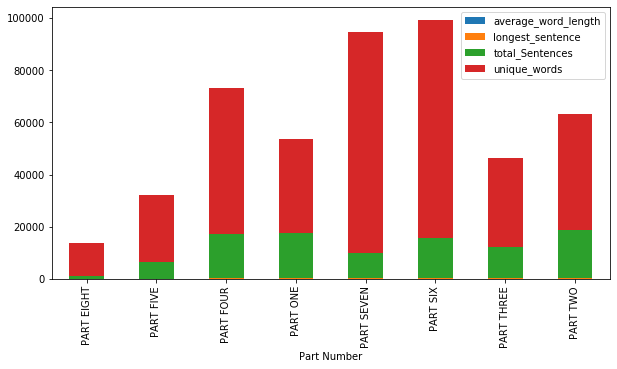

In [64]:
fig, ax = plt.subplots(figsize=(10,5))

yd.plot(x='Part Number' , y=['average_word_length','longest_sentence','total_Sentences','unique_words'], kind="bar",stacked=True,ax=ax)